#Assignment – 2 
#EE769 – Introduction to Machine Learning





Objectives of problem :
1. This is a classification problem - as we need to find out the number of pumps that require repairs (functional, but need repairs we can say) and those that are not functional (these may need to be replaced).

2. To do this we need to build a classifier by using the available ML frameworks and choose which one has the best performance. As it is a classification problem we would check the  accuracy to see how many are correctly classified. 

3. After analysis of data, provided in training set, correct hypothesis can be made about which ML framework would be best to use. 

Loading datasets....

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print('You uploaded file "{name}" with length {length} bytes'. format(name=fn, length=len(uploaded[fn])))

Saving Train.csv to Train.csv
Saving test.csv to test.csv
You uploaded file "Train.csv" with length 15641512 bytes
You uploaded file "test.csv" with length 5095968 bytes


Throughout our analysis, we seek to answer three main questions:

1. How does well functionality vary across Tanzania's geographical regions?
2. What features are important in determining whether a well is functional, in need of repair, or completely nonfunctional?
3. What is the best model to predict the status of a well?

#Data exploration and visualization with insightful commentary to determine potentially useful variables.

Opening csv and checking format and structure of training data provided. Here we will choose what variables or features we can use for the prediction - what the output should be, what needs to be cleaned and if there are missing values, NaN values how we can replace them with sensible values to help in the analysis.

We will not be looking at the test data at all. Whatever changes we apply to the training dataset we apply to the test dataset at the sametime. These steps were arrived at after some trial and error

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_df = pd.read_csv('Train.csv')
display(train_df)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
test_df = pd.read_csv('test.csv')
display(test_df)

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,21215,0.0,2011-02-25,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,Rufiji,Mahanzi,Iringa,11,1,Iringa Rural,Wasa,769,True,GeoData Consultants Ltd,VWC,Wasa,True,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,25893,0.0,2011-04-17,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Uzunguni,Dodoma,1,1,Kondoa,Chandama,0,True,GeoData Consultants Ltd,VWC,Soya,False,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,2,15713,0.0,2011-03-27,Water,0,Gover,36.363337,-7.297600,Uganda,0,Rufiji,Uganda,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,3,17247,0.0,2011-07-14,Ka,0,KA,31.496315,-2.167140,Kakindo,0,Lake Victoria,Nyamilanda A,Kagera,18,3,Muleba,Kyebitembe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,4,1248,0.0,2011-07-31,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Ibosa,Kagera,18,2,Bukoba Rural,Nyakato,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,14845,45291,1000.0,2011-03-10,Danida,1811,DANID,34.533405,-9.781788,none,0,Lake Nyasa,Ng'Alike,Iringa,11,5,Ludewa,Mlangali,45,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14846,14846,54736,0.0,2011-03-18,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,Rufiji,Magoha,Morogoro,5,3,Kilombero,Lumemo,150,True,GeoData Consultants Ltd,NaN,NaN,True,2010,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,14847,44238,0.0,2012-11-03,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,Lake Tanganyika,Simbo 2,Tabora,14,3,Uyui,Magiri,0,True,GeoData Consultants Ltd,VWC,Maguri water supply,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14848,14848,13229,0.0,2013-01-18,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,Lake Tanganyika,Maendeleo,Kigoma,16,1,Kibondo,Rugongowe,700,True,GeoData Consultants Ltd,VWC,Kichananga gravity water supply,False,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe


In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

1. Shape of the dataset
2. Info of the dataset
3. Data types of variables
4. The range of the features
5. If there are missing values/Nan values
6. The unique values in the columns and their frequency
7. What are the output labels, what information is given by each variable - categorical, numeric, location, date time.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14850 non-null  int64  
 1   id                     14850 non-null  int64  
 2   amount_tsh             14850 non-null  float64
 3   date_recorded          14850 non-null  object 
 4   funder                 14008 non-null  object 
 5   gps_height             14850 non-null  int64  
 6   installer              14002 non-null  object 
 7   longitude              14850 non-null  float64
 8   latitude               14850 non-null  float64
 9   wpt_name               14850 non-null  object 
 10  num_private            14850 non-null  int64  
 11  basin                  14850 non-null  object 
 12  subvillage             14766 non-null  object 
 13  region                 14850 non-null  object 
 14  region_code            14850 non-null  int64  
 15  di

In [ ]:
nullcols = []
for col in train_df.columns:
    nbnull = (train_df[col].isnull()*1).sum()
    if ( nbnull > 0 ):
        tp = type(train_df[train_df[col].notnull()][col].iat[0]) # type of first non null value
        nullcols.append([col, tp])
        print(col, nbnull, tp)

funder 2793 <class 'str'>
installer 2807 <class 'str'>
subvillage 287 <class 'str'>
public_meeting 2491 <class 'bool'>
scheme_management 2832 <class 'str'>
scheme_name 21110 <class 'str'>
permit 2336 <class 'bool'>


In [ ]:
nullcols = []
for col in test_df.columns:
    nbnull = (test_df[col].isnull()*1).sum()
    if ( nbnull > 0 ):
        tp = type(test_df[test_df[col].notnull()][col].iat[0]) # type of first non null value
        nullcols.append([col, tp])
        print(col, nbnull, tp)

funder 842 <class 'str'>
installer 848 <class 'str'>
subvillage 84 <class 'str'>
public_meeting 843 <class 'bool'>
scheme_management 1045 <class 'str'>
scheme_name 7056 <class 'str'>
permit 720 <class 'bool'>


# Observations after EDA

There are 44550 pumps, 41 columns

Out of them 39 are features and the first column is the pump id with which we will associate the output prediction.

###Labels :

The labels are under the column "status_group" and are one of the three following values:
- functional - the waterpoint is operational and there are no repairs needed
- functional needs repair - the waterpoint is operational, but needs repairs
- non functional - the waterpoint is not operational

It is a categorical labelled column

###Categorical Features :

We have the following categorical variables:
- funder - Who funded the well, this has null values maybe all funders were not named.
- installer - Organization that installed the well, this has null values 
- wpt_name - Name of the waterpoint if there is one
- basin - Geographic water basin
- subvillage - Geographic location, this has null values
- region - Geographic location
- recorded_by - Group entering this row of data, it seems to be same company (as it has only 1 unique value) so this column would be eliminated
- public_meeting (True/False), this has null values 
- permit (True/False) - If the waterpoint is permitted, this has null values 
- scheme_management - Who operates the waterpoint, this has null values 
- scheme_name - Who operates the waterpoint, this has null values 
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- quantity - The quantity of water (dry, enough, insufficient, seasonal, unknown)
- quantity_group - The quantity of the water
- lga - Geographic location
- ward - Geographic location
- date_recorded - The date the row was entered

###Continuous Features:
We have four quantitative features:

- amount_tsh - Total static head (amount of water available to waterpoint)
- gps_height - Altitude of the well
- longitude - GPS coordinate
- lattitude - GPS coordinate
- num_private - no avaiable information (maybe can be eliminated)
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- population - Population around the well
- construction_year- Year the waterpoint was constructed

So we have 
1. 1 column - id
2. 30 columns of categorical variables
3. 9 columns of continuous variables
4. 1 column - status_group - labels

Hence 41 columns variables are mapped...

Also it is seen that there are a number of features that are mapped to a "_group" column which lead to redundancies. So we can delete one of these columns for a particular type of feature.

Now we begin the visualization and mapping of variables to find useful features that we can utilise for prediction. This is a very freeform process, and again each dataset is different, so there is no one size fits all strategy.
There mare many categorical columns with null/missing values and those where the missing values are hidden with '0' or a none. We can check these by seeing the values that have a very high frequency in the column.

As we have geographical data we can also try to create geographical maps, besides regular histograms and boxplots. LEt us start by analysing the continuous features.

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 9.1 MB/s 
     |████████████████████████████████| 6.3 MB 35.1 MB/s 
     |████████████████████████████████| 15.4 MB 59.6 MB/s 


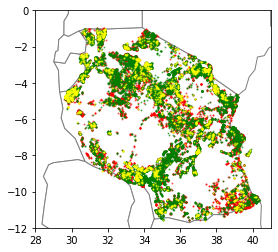

In [ ]:
df = train_df   #For visualizing results storing the DataFrame 

import geopandas

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

functional = gdf.where(gdf['status_group'] == 'functional')
repair = gdf.where(gdf['status_group'] == 'functional needs repair')
broken = gdf.where(gdf['status_group'] == 'non functional')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray')

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=1)

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=1)

ax.scatter(repair['longitude'], repair['latitude'],
           c='yellow', alpha=.5, s=1)



plt.ylim(-12, 0)
plt.xlim(28,41)

plt.show()

#Variable transformation, feature engineering, feature selection or elimination

In [ ]:
train_df['gps_height'].replace(0.0, np.nan, inplace=True)
train_df['population'].replace(0.0, np.nan, inplace=True)
train_df['amount_tsh'].replace(0.0, np.nan, inplace=True)
train_df.isnull().sum()

id                           0
amount_tsh               31231
date_recorded                0
funder                    2793
gps_height               15441
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               16150
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
test_df['gps_height'].replace(0.0, np.nan, inplace=True)
test_df['population'].replace(0.0, np.nan, inplace=True)
test_df['amount_tsh'].replace(0.0, np.nan, inplace=True)
test_df.isnull().sum()

Unnamed: 0                   0
id                           0
amount_tsh               10408
date_recorded                0
funder                     842
gps_height                4997
installer                  848
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                  84
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                5231
public_meeting             843
recorded_by                  0
scheme_management         1045
scheme_name               7056
permit                     720
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [ ]:
train_df["gps_height"].fillna(train_df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
train_df["gps_height"].fillna(train_df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
train_df["gps_height"].fillna(train_df["gps_height"].mean(), inplace=True)
train_df["population"].fillna(train_df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
train_df["population"].fillna(train_df.groupby(['region'])["population"].transform("median"), inplace=True)
train_df["population"].fillna(train_df["population"].median(), inplace=True)
train_df["amount_tsh"].fillna(train_df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
train_df["amount_tsh"].fillna(train_df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
train_df["amount_tsh"].fillna(train_df["amount_tsh"].median(), inplace=True)
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
test_df["gps_height"].fillna(test_df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
test_df["gps_height"].fillna(test_df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
test_df["gps_height"].fillna(test_df["gps_height"].mean(), inplace=True)
test_df["population"].fillna(test_df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
test_df["population"].fillna(test_df.groupby(['region'])["population"].transform("median"), inplace=True)
test_df["population"].fillna(test_df["population"].median(), inplace=True)
test_df["amount_tsh"].fillna(test_df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
test_df["amount_tsh"].fillna(test_df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
test_df["amount_tsh"].fillna(test_df["amount_tsh"].median(), inplace=True)
test_df.isnull().sum()

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

In [ ]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
train_df[features] = scaler.fit_transform(train_df[features])
train_df[features].head(20)
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
test_df[features] = scaler.fit_transform(test_df[features])
test_df[features].head(20)
test_df.isnull().sum()

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

Visualising some plots with status groups. Checking the counts.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64

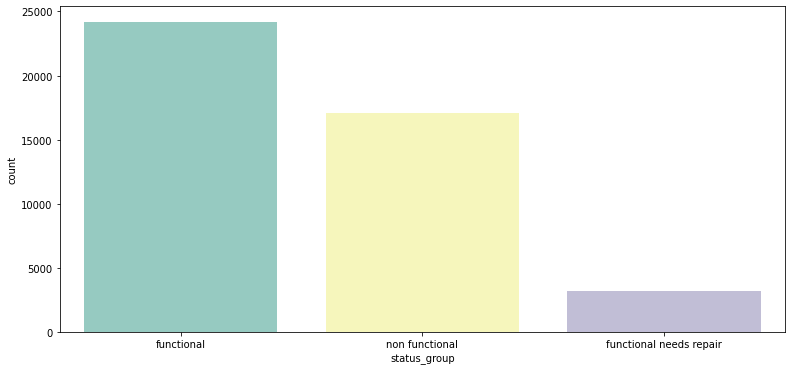

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(train_df.status_group, palette = 'Set3')
train_df.status_group.value_counts()

Let us check with water quality first and how many are functional.

soft                  38093
salty                  3668
unknown                1397
milky                   606
coloured                364
salty abandoned         264
fluoride                147
fluoride abandoned       11
Name: water_quality, dtype: int64

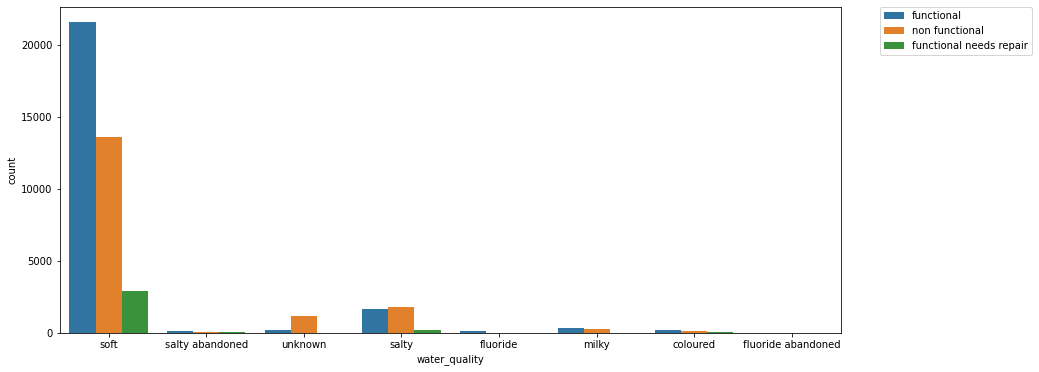

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=train_df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train_df.water_quality.value_counts()

Wherever the water is soft then there is a very high probability of the pumps being functional, while if it is salty then there are almost equal probability of functional and non-functional.

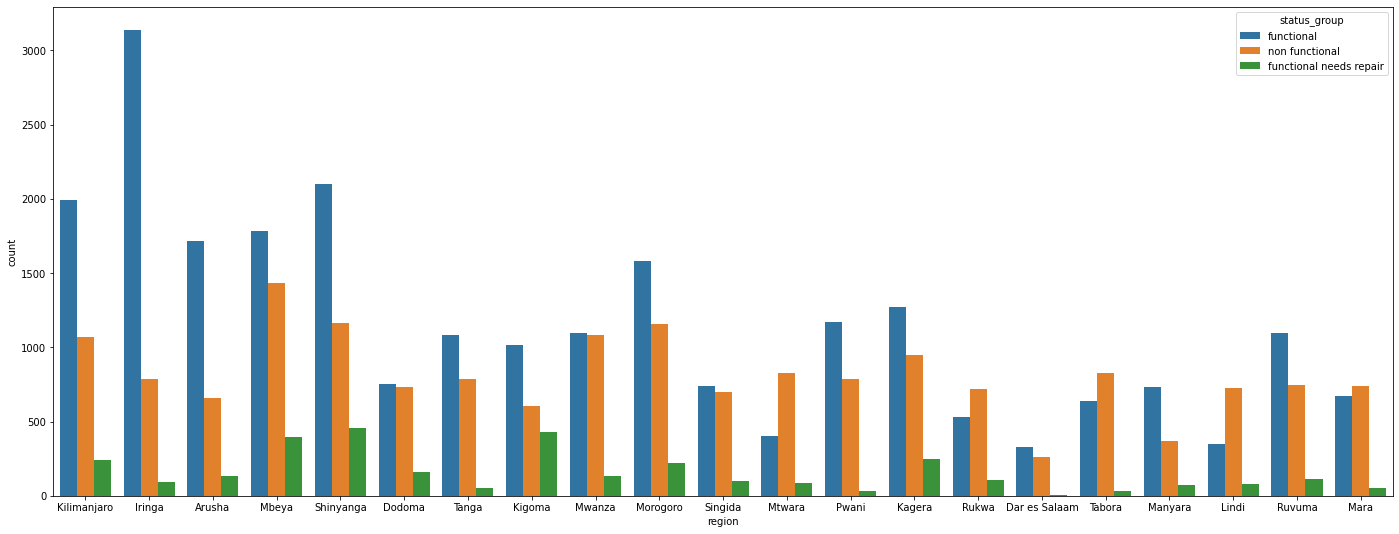

In [ ]:
plt.figure(figsize=(24, 9))
sns.countplot(data=train_df,x='region',hue='status_group')

Amount of functional pumps is distributed quite unevenly some have higher probability to have non-functional pumps, pumps needing repair don't seem to be much dominance. Checking the population dependence, we have 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


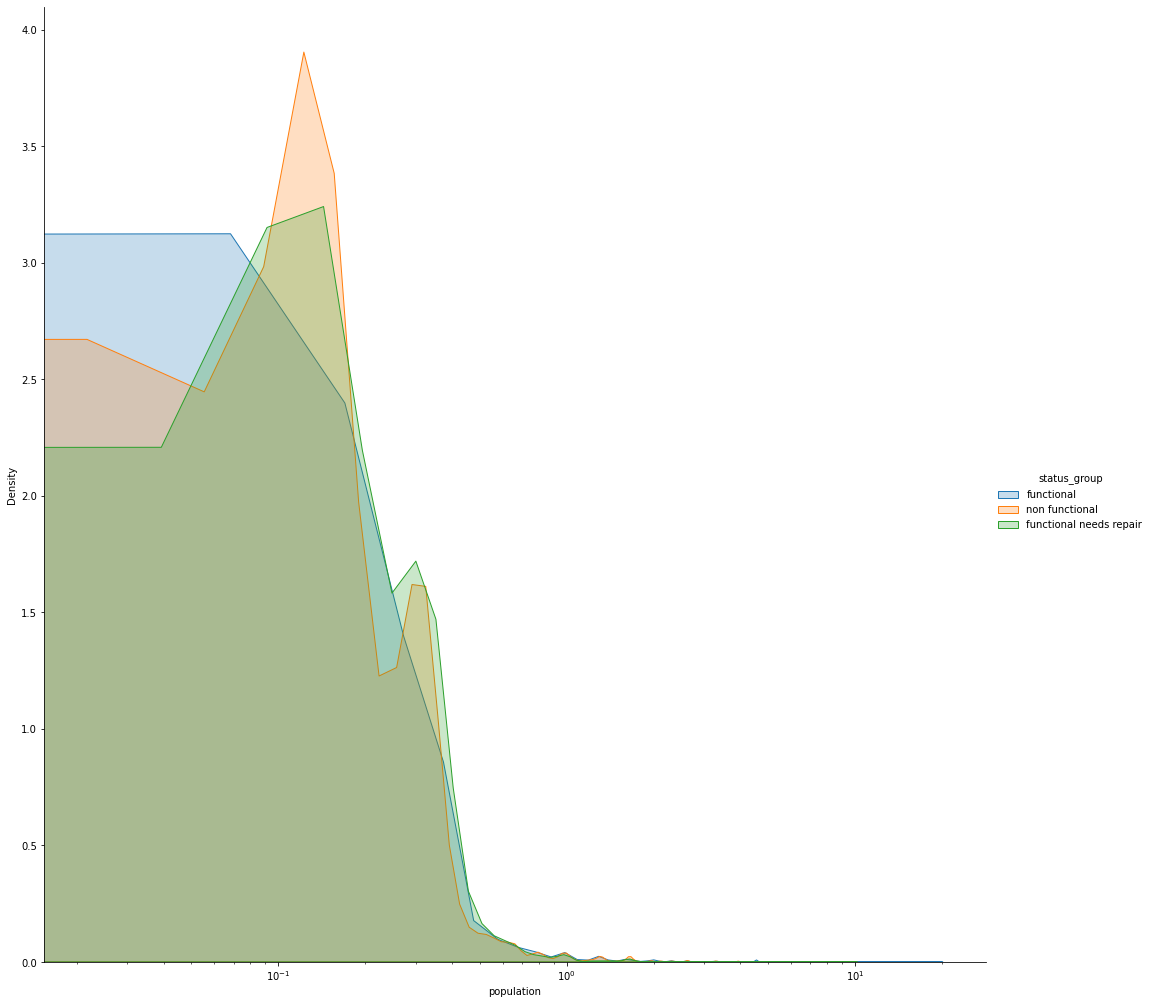

In [ ]:
splot=sns.FacetGrid(train_df, hue='status_group',size=14).map(sns.kdeplot, 'population', shade=True).add_legend()
splot.set(xscale="log")

As population increases we have more functional pumps. Let us check the construction year variable.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


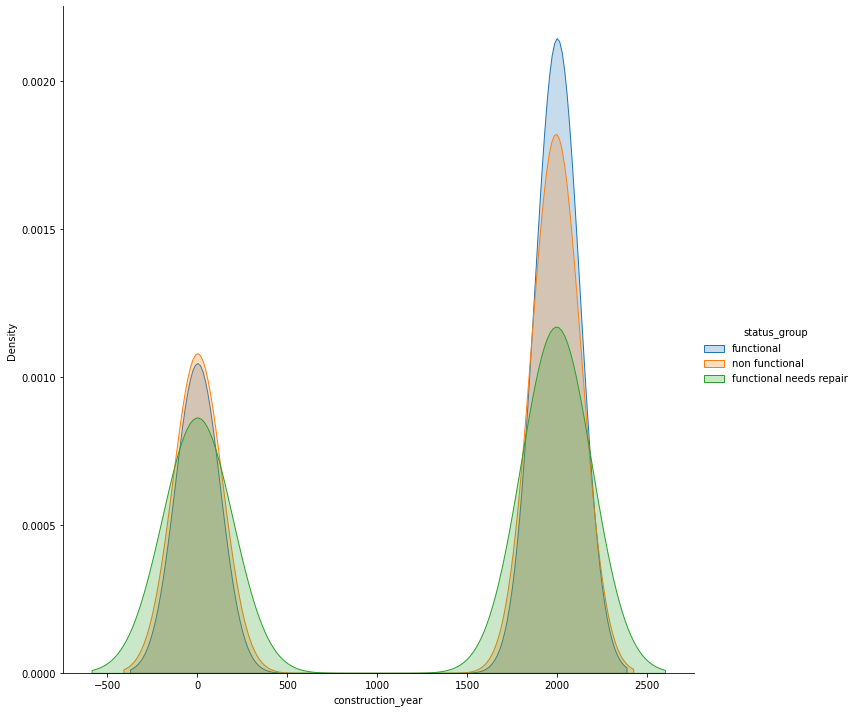

In [ ]:
(sns.FacetGrid(train_df, hue='status_group',size=10).map(sns.kdeplot, 'construction_year', shade=True).add_legend())

We can see a number of variables have a year of construction set to 0, we can correct this later by imputing some mean value. The rest of the observation years are close to 2000. Similarly with two other variables like the lattitude and longitude also have 0 values, these are like missing values but they are hidden so we have to replace 0 with a mean value.

In [ ]:
train_df['longitude'].replace(0.0, np.nan, inplace=True)
train_df['latitude'].replace(0.0, np.nan, inplace=True)
train_df['construction_year'].replace(0.0, np.nan, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     44550 non-null  int64   
 1   amount_tsh             44550 non-null  float64 
 2   date_recorded          44550 non-null  object  
 3   funder                 41757 non-null  object  
 4   gps_height             44550 non-null  float64 
 5   installer              41743 non-null  object  
 6   longitude              43196 non-null  float64 
 7   latitude               44550 non-null  float64 
 8   wpt_name               44550 non-null  object  
 9   num_private            44550 non-null  int64   
 10  basin                  44550 non-null  object  
 11  subvillage             44263 non-null  object  
 12  region                 44550 non-null  object  
 13  region_code            44550 non-null  int64   
 14  district_code          44550 non-null 

In [ ]:
test_df['longitude'].replace(0.0, np.nan, inplace=True)
test_df['latitude'].replace(0.0, np.nan, inplace=True)
test_df['construction_year'].replace(0.0, np.nan, inplace=True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14850 non-null  int64  
 1   id                     14850 non-null  int64  
 2   amount_tsh             14850 non-null  float64
 3   date_recorded          14850 non-null  object 
 4   funder                 14008 non-null  object 
 5   gps_height             14850 non-null  float64
 6   installer              14002 non-null  object 
 7   longitude              14850 non-null  float64
 8   latitude               14850 non-null  float64
 9   wpt_name               14850 non-null  object 
 10  num_private            14850 non-null  int64  
 11  basin                  14850 non-null  object 
 12  subvillage             14766 non-null  object 
 13  region                 14850 non-null  object 
 14  region_code            14850 non-null  int64  
 15  di

In [ ]:
train_df.drop('geometry', axis=1, inplace=True)

We will use the fillna function to fill the Nan values which we used to replace the 0s in longitude,lattitude and construction year.

In [ ]:
train_df["latitude"].fillna(train_df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
train_df["longitude"].fillna(train_df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
train_df["longitude"].fillna(train_df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
train_df["construction_year"].fillna(train_df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
train_df["construction_year"].fillna(train_df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
train_df["construction_year"].fillna(train_df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
train_df["construction_year"].fillna(train_df["construction_year"].median(), inplace=True)
print(train_df.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
test_df["latitude"].fillna(test_df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
test_df["longitude"].fillna(test_df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
test_df["longitude"].fillna(test_df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df["construction_year"].median(), inplace=True)
print(test_df.isnull().sum())

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

The older a waterpoint is the more likely it will be non-functional and may need to be replaced. We can engineer an Age variable and try to find the difference between the year the pump was constructed and the year the record was made. 

In [ ]:
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])
train_df.date_recorded.head(5)
print(train_df.date_recorded.dt.year.head(5))
print(train_df.construction_year.head(5))
#This function grabs the year
train_df['Age'] = train_df.date_recorded.dt.year - train_df.construction_year
train_df.Age.head(5)

0    2013
1    2011
2    2013
3    2011
4    2013
Name: date_recorded, dtype: int64
0    2008.0
1    1984.0
2    2002.0
3    2000.0
4    2007.0
Name: construction_year, dtype: float64


0     5.0
1    27.0
2    11.0
3    11.0
4     6.0
Name: Age, dtype: float64

In [ ]:
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])
test_df.date_recorded.head(5)
print(test_df.date_recorded.dt.year.head(5))
print(test_df.construction_year.head(5))
#This function grabs the year
test_df['Age'] = test_df.date_recorded.dt.year - test_df.construction_year
test_df.Age.head(5)

0    2011
1    2011
2    2011
3    2011
4    2011
Name: date_recorded, dtype: int64
0    2004.0
1    1999.0
2    1999.0
3    1999.0
4    1999.0
Name: construction_year, dtype: float64


0     7.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


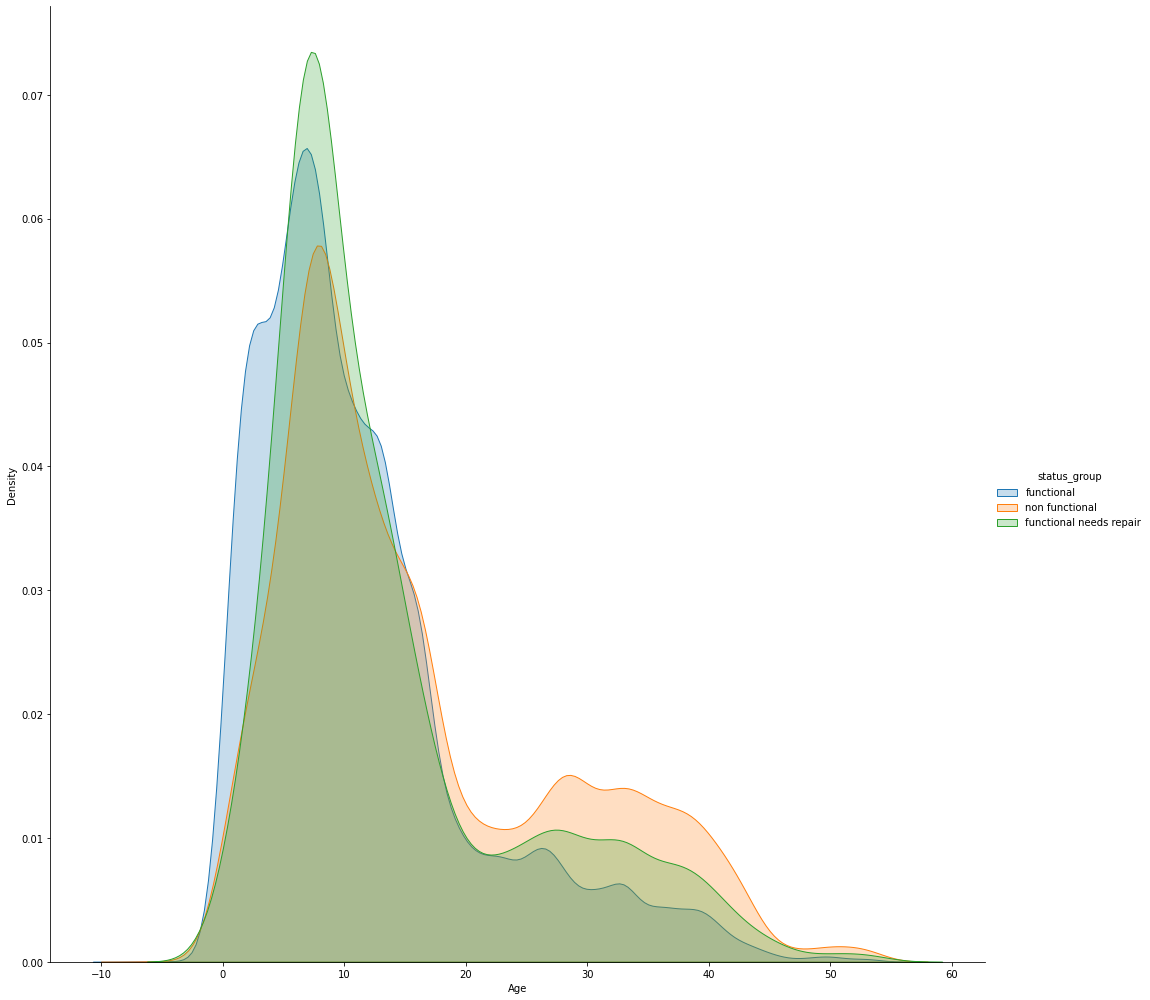

In [ ]:
(sns.FacetGrid(train_df, hue='status_group',size=14).map(sns.kdeplot, 'Age', shade=True).add_legend())

As more pumps age the more they need repair or they need to be replaced, this may turn out to be an important variable later. A number of features also are not very useful, for example the recorded_by tells us the agency that made the record which has just 1 unique value it can be dropped. Also num_private also seems to be not useful as it has only 0 has a unique value. We can drop that. 

In [ ]:
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
train_df.drop(waste_features,axis=1,inplace=True)
test_df.drop(waste_features,axis=1,inplace=True)

As stated earlier many features are having redundant columns we examine them and see how many levels are similar between these columns and drop a few leaving only one to avoid having redundant data and to make analysis easier with less number of and with important features.

In [ ]:
print(test_df.groupby(['management', 'management_group']).size() )
print(train_df.groupby(['management', 'management_group']).size() )

management        management_group
company           commercial            173
other             other                 222
other - school    other                  29
parastatal        parastatal            421
private operator  commercial            486
trust             commercial             16
unknown           unknown               159
vwc               user-group          10136
water authority   commercial            227
water board       user-group            712
wua               user-group            628
wug               user-group           1641
dtype: int64
management        management_group
company           commercial            512
other             other                 622
other - school    other                  70
parastatal        parastatal           1347
private operator  commercial           1485
trust             commercial             62
unknown           unknown               402
vwc               user-group          30371
water authority   commercial         

In [ ]:
train_df.drop('management_group',axis=1,inplace=True)
test_df.drop('management_group',axis=1,inplace=True)

Similarly for some others

In [ ]:
print(train_df.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['scheme_management', 'scheme_name']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['payment', 'payment_type']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['water_quality', 'quality_group']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['quantity', 'quantity_group']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['source', 'source_type', 'source_class']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['waterpoint_type', 'waterpoint_type_group']).size())
print("-------------------------------------------------------------------------------------------------")
print(train_df.groupby(['lga', 'ward','status_group']).size())

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1339
gravity                gravity                gravity                      20127
india mark ii          handpump               india mark ii                 1768
india mark iii         handpump               india mark iii                  77
mono                   motorpump              mono                          2164
nira/tanira            handpump               nira/tanira                   6130
other                  other                  other                         4768
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               65
                                              other - swn 81                 177
                                              walimi                          39
other motorpump        motorpump     

In [ ]:
train_df.drop('extraction_type_group',axis=1,inplace=True)
test_df.drop('extraction_type_group',axis=1,inplace=True)
train_df.drop('extraction_type_class',axis=1,inplace=True)
test_df.drop('extraction_type_class',axis=1,inplace=True)
train_df.drop('scheme_name',axis=1,inplace=True)
test_df.drop('scheme_name',axis=1,inplace=True)
train_df.drop('payment',axis=1,inplace=True)
test_df.drop('payment',axis=1,inplace=True)
train_df.drop('quality_group',axis=1,inplace=True)
test_df.drop('quality_group',axis=1,inplace=True)
train_df.drop('quantity_group',axis=1,inplace=True)
test_df.drop('quantity_group',axis=1,inplace=True)
train_df.drop('source_type',axis=1,inplace=True)
test_df.drop('source_type',axis=1,inplace=True)
train_df.drop('source_class',axis=1,inplace=True)
test_df.drop('source_class',axis=1,inplace=True)
train_df.drop('waterpoint_type_group',axis=1,inplace=True)
test_df.drop('waterpoint_type_group',axis=1,inplace=True)
train_df.drop('ward',axis=1,inplace=True)
test_df.drop('ward',axis=1,inplace=True)
train_df.drop('installer',axis=1,inplace=True)
test_df.drop('installer',axis=1,inplace=True)
train_df.drop('public_meeting', axis=1, inplace=True)
train_df.drop('permit', axis=1, inplace=True)
test_df.drop('public_meeting', axis=1, inplace=True)
test_df.drop('permit', axis=1, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 44550 non-null  int64         
 1   amount_tsh         44550 non-null  float64       
 2   date_recorded      44550 non-null  datetime64[ns]
 3   funder             41757 non-null  object        
 4   gps_height         44550 non-null  float64       
 5   longitude          44550 non-null  float64       
 6   latitude           44550 non-null  float64       
 7   wpt_name           44550 non-null  object        
 8   num_private        44550 non-null  int64         
 9   basin              44550 non-null  object        
 10  subvillage         44263 non-null  object        
 11  region             44550 non-null  object        
 12  region_code        44550 non-null  int64         
 13  district_code      44550 non-null  int64         
 14  lga   

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         14850 non-null  int64         
 1   id                 14850 non-null  int64         
 2   amount_tsh         14850 non-null  float64       
 3   date_recorded      14850 non-null  datetime64[ns]
 4   funder             14008 non-null  object        
 5   gps_height         14850 non-null  float64       
 6   longitude          14850 non-null  float64       
 7   latitude           14850 non-null  float64       
 8   wpt_name           14850 non-null  object        
 9   num_private        14850 non-null  int64         
 10  basin              14850 non-null  object        
 11  subvillage         14766 non-null  object        
 12  region             14850 non-null  object        
 13  region_code        14850 non-null  int64         
 14  distri

To avoid any random capitalization 

In [ ]:
train_df.waterpoint_type = train_df.waterpoint_type.str.lower()
train_df.funder = train_df.funder.str.lower()
train_df.basin =train_df.basin.str.lower()
train_df.region =train_df.region.str.lower()
train_df.source = train_df.source.str.lower()
train_df.lga =train_df.lga.str.lower()
train_df.management = train_df.management.str.lower()
train_df.quantity = train_df.quantity.str.lower()
train_df.water_quality = train_df.water_quality.str.lower()
train_df.payment_type=train_df.payment_type.str.lower()
train_df.extraction_type=train_df.extraction_type.str.lower()

In [ ]:
test_df.waterpoint_type = test_df.waterpoint_type.str.lower()
test_df.funder = test_df.funder.str.lower()
test_df.basin =test_df.basin.str.lower()
test_df.region = test_df.region.str.lower()
test_df.source = test_df.source.str.lower()
test_df.lga = test_df.lga.str.lower()
test_df.management = test_df.management.str.lower()
test_df.quantity =test_df.quantity.str.lower()
test_df.water_quality = test_df.water_quality.str.lower()
test_df.payment_type=test_df.payment_type.str.lower()
test_df.extraction_type=test_df.extraction_type.str.lower()

Finally cleaning up some categorical variables and writing output to a csv fill that will be read in the modelling section for the training data

In [ ]:
train_df["funder"].fillna("other", inplace=True)
train_df["scheme_management"].fillna("other", inplace=True)
print(train_df.isnull().sum())
train_df.drop('date_recorded', axis=1, inplace=True)
train_df.drop('construction_year', axis=1, inplace=True)
train_df.info()
train_df.quantity.head(5)
pd.DataFrame(train_df.to_csv("clean.csv"))

id                     0
amount_tsh             0
date_recorded          0
funder                 0
gps_height             0
longitude              0
latitude               0
wpt_name               0
num_private            0
basin                  0
subvillage           287
region                 0
region_code            0
district_code          0
lga                    0
population             0
recorded_by            0
scheme_management      0
construction_year      0
extraction_type        0
management             0
payment_type           0
water_quality          0
quantity               0
source                 0
waterpoint_type        0
status_group           0
Age                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 44550 non-null  int64  
 1   amount_tsh         44550 non-

""


Similarly for test data

In [ ]:
test_df["funder"].fillna("other", inplace=True)
test_df["scheme_management"].fillna("other", inplace=True)
print(test_df.isnull().sum())
test_df.drop('date_recorded', axis=1, inplace=True)
test_df.drop('construction_year', axis=1, inplace=True)
test_df.info()
test_df.quantity.head(5)
pd.DataFrame(test_df).to_csv("clean_test.csv")

Unnamed: 0            0
id                    0
amount_tsh            0
funder                0
gps_height            0
longitude             0
latitude              0
wpt_name              0
num_private           0
basin                 0
subvillage           84
region                0
region_code           0
district_code         0
lga                   0
population            0
recorded_by           0
scheme_management     0
extraction_type       0
management            0
payment_type          0
water_quality         0
quantity              0
source                0
waterpoint_type       0
Age                   0
dtype: int64


KeyError: ignored

Finally we are left with 20 features from 41 and we will use them to predict the status of the water pumps. We also engineered an Age feature. 

References :

1] https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

2] https://medium.com/@vaibhavshukla182/pump-it-up-data-mining-the-water-table-f903d4cfc7a8

3] https://seaborn.pydata.org/index.html

4] https://www.kaggle.com/dylanli/pump-it-up-data-mining-the-water-table